In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sbn
import numpy as np
from sklearn.model_selection import train_test_split

## importing dataset


#### 1.

In [2]:
file_name = "data.txt"
col_name = []
for i in range(7):
    col_name.append("feature" + str(i) )
col_name.append("label")
data = pd.read_csv(file_name, sep='\t', header=None, names=col_name)

In [3]:
data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,label
0,12.10,12.20,0.8000,5.001,2.020,6.158,4.200,1
1,11.90,12.10,0.7800,5.001,2.100,6.210,4.150,1
2,22.00,16.10,0.9500,7.100,4.500,1.100,6.500,1
3,14.00,13.50,0.8711,6.100,3.500,3.000,5.218,1
4,18.05,14.50,0.9200,6.223,3.850,2.050,5.805,1
...,...,...,...,...,...,...,...,...
227,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
228,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
229,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
230,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


#### 2.

In [4]:
sample_num = data.shape[0]

In [5]:
len(data['label'].unique())

3

In [6]:
label = data['label']

#### 3.

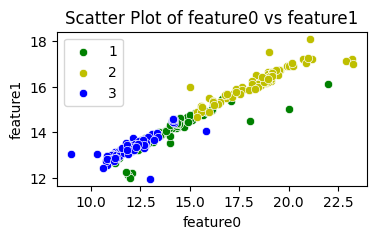

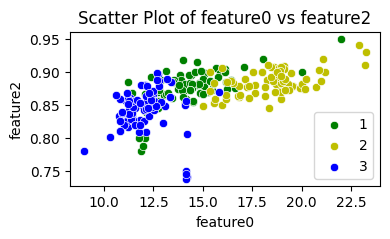

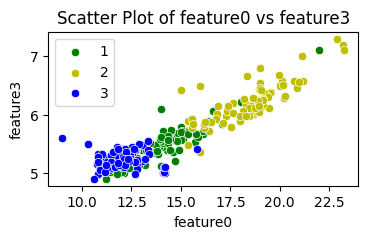

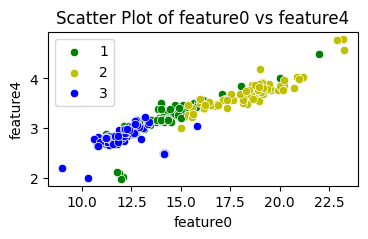

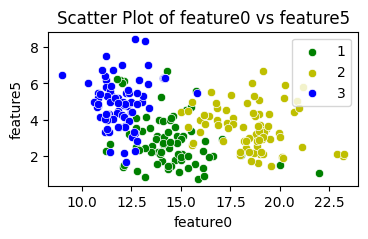

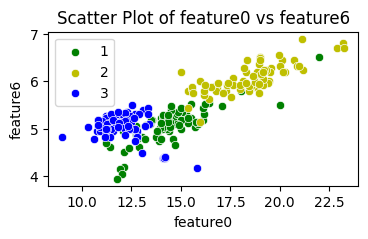

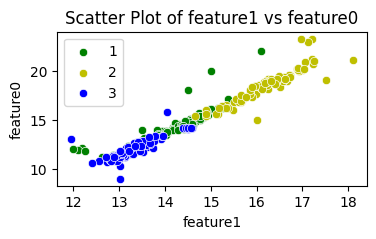

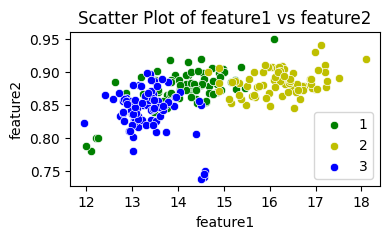

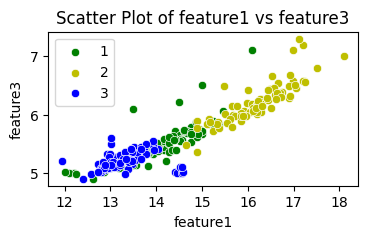

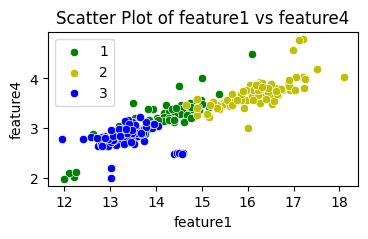

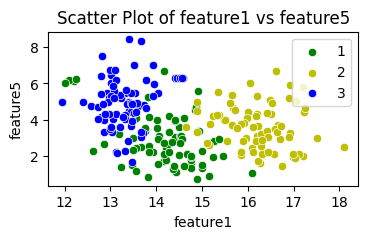

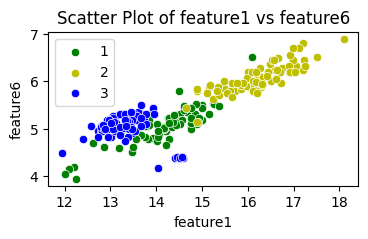

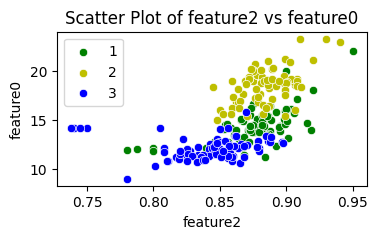

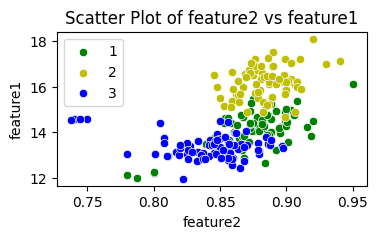

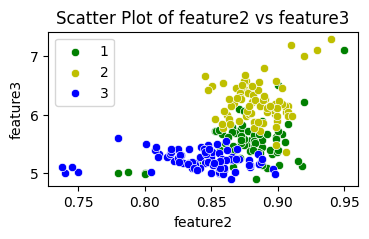

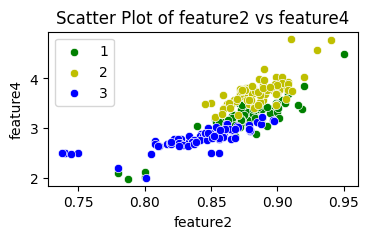

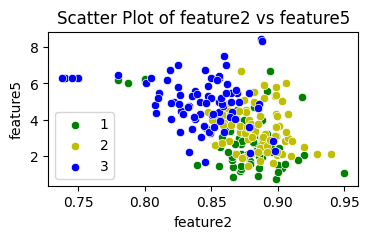

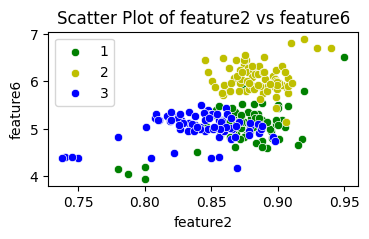

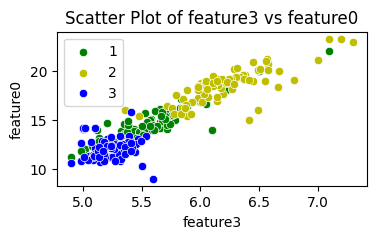

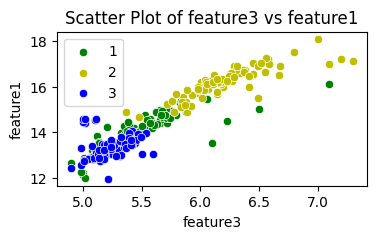

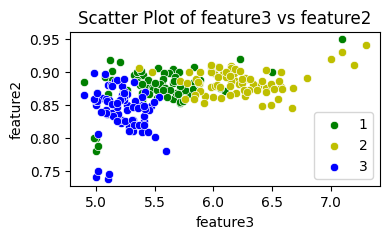

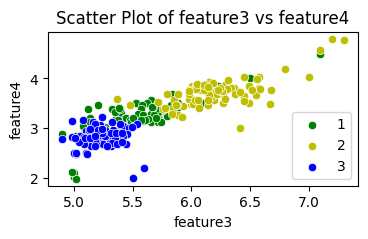

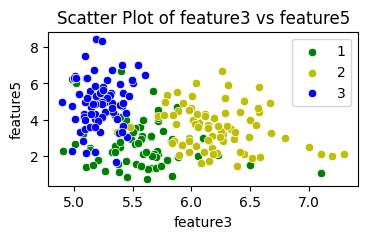

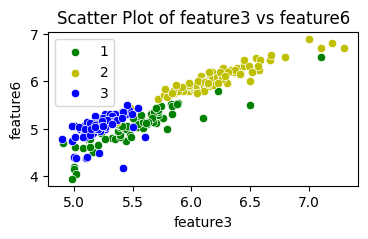

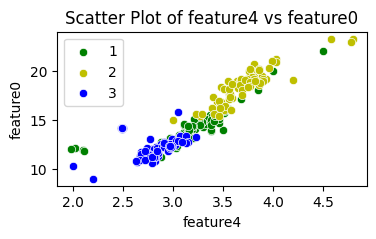

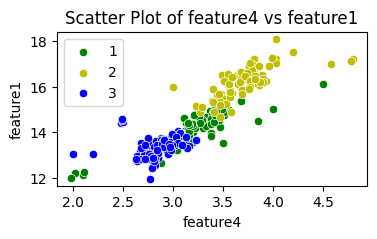

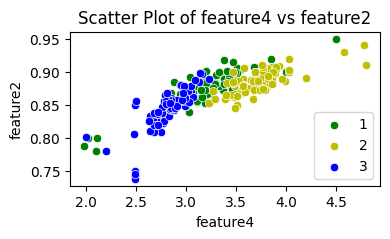

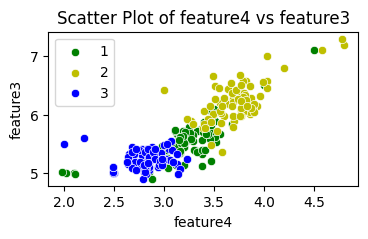

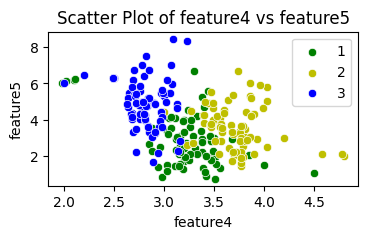

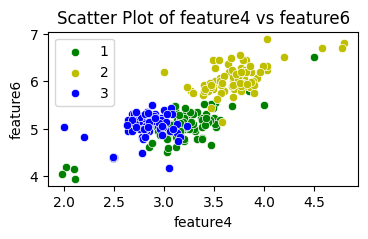

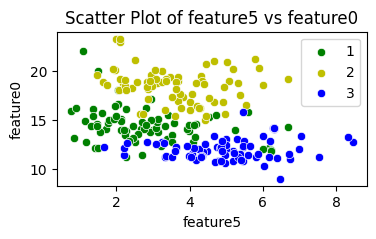

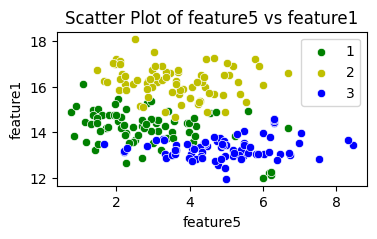

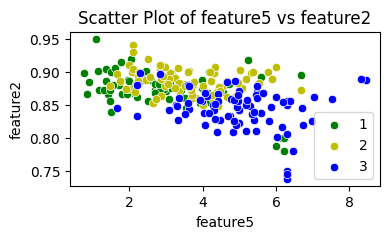

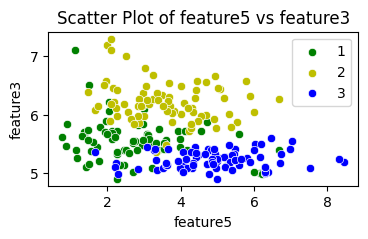

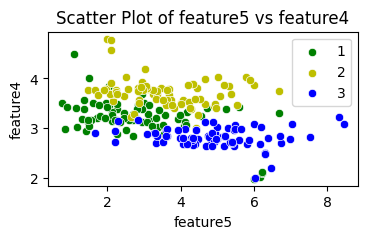

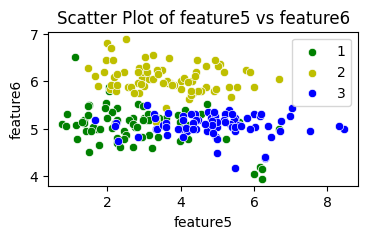

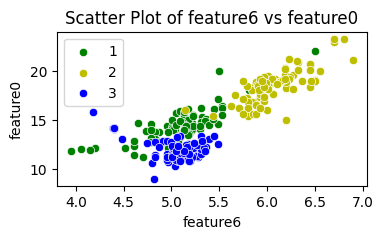

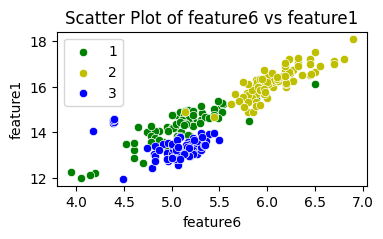

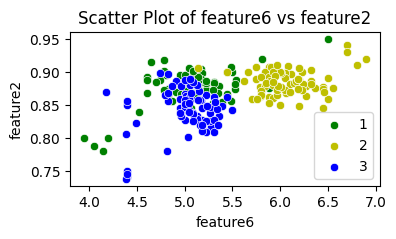

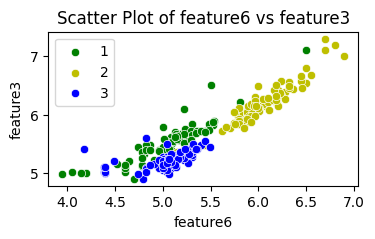

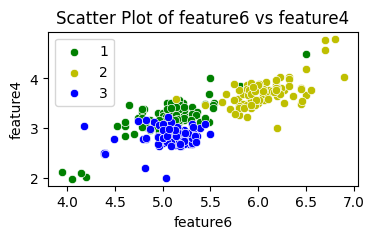

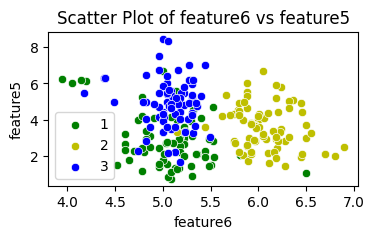

In [7]:
for i in range(len(data.columns) - 1):
    for j in range(len(data.columns) - 1):
        if i != j :
            plt.figure(figsize=(4, 2))  
            sbn.scatterplot(x=data[label == 1]["feature"+str(i)], y=data[label == 1]["feature"+str(j)],c='g',label='1')
            sbn.scatterplot(x=data[label == 2]["feature"+str(i)], y=data[label == 2]["feature"+str(j)],c='y',label='2')
            sbn.scatterplot(x=data[label == 3]["feature"+str(i)], y=data[label == 3]["feature"+str(j)],c='b',label='3')
            # plt.scatter(x_test[y_test == 0]['loc'], x_test[y_test == 0]['branchCount'], c='g', marker='x', label='Healthy (Test)')
            # plt.scatter(x_test[y_test == 1]['loc'], x_test[y_test == 1]['branchCount'], c='y', marker='x', label='Defective (Test)')
            plt.title(f'Scatter Plot of {data.columns[i]} vs {data.columns[j]}')
            plt.xlabel(data.columns[i])
            plt.ylabel(data.columns[j])
            plt.show()

#### 4.

### threshold equal to 2.75

C:\Users\sepito\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sepito\AppData\Local\Temp\ipykernel_9884\3620463067.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Explicitly adjust the subplots to fit in the figure area.


<Figure size 1500x1500 with 0 Axes>

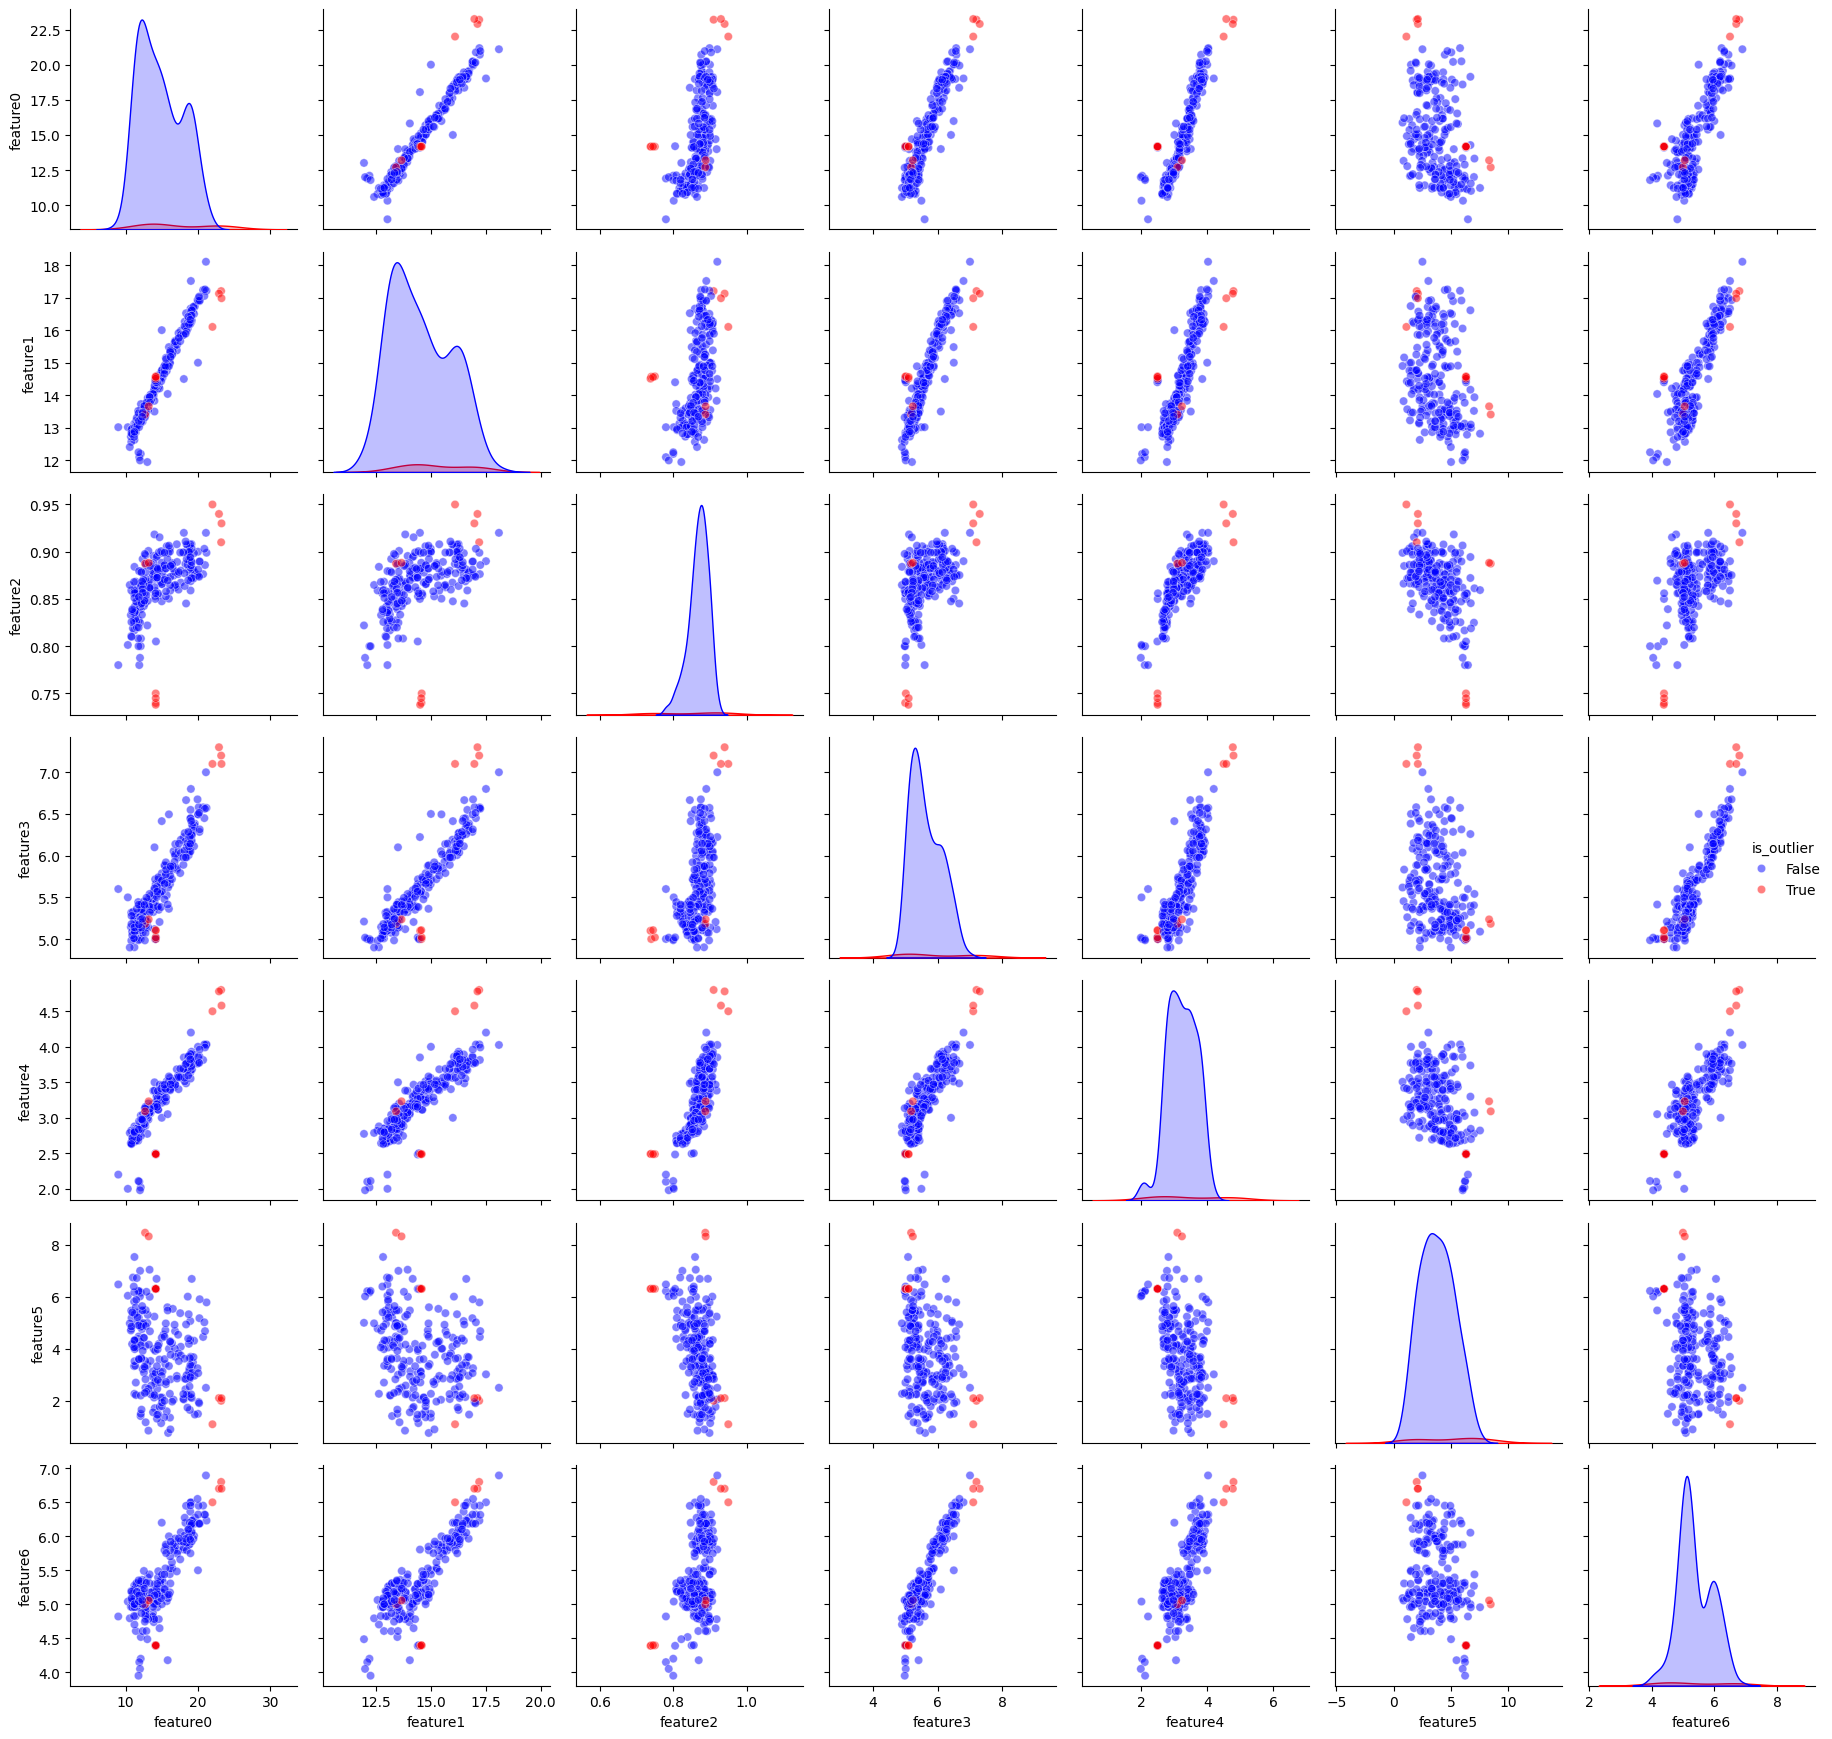

In [8]:
# Calculate Z-scores for the entire dataset (excluding the label column)
z_scores = data.drop(columns='label').apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))

# Set the Z-score threshold
threshold = 2.75

# Identify outliers
# Identify outliers
is_outlier = (z_scores > threshold).any(axis=1)

# Add a column to your DataFrame to mark outliers
data['is_outlier'] = is_outlier

# Pair plot with Seaborn
plt.figure(figsize=(15, 15))
pair_plot = sbn.pairplot(data.drop(columns='label'), 
                         hue='is_outlier', 
                         palette={True: 'red', False: 'blue'}, 
                         plot_kws={'alpha': 0.5})

plt.tight_layout()  # Explicitly adjust the subplots to fit in the figure area.
plt.show()

# Remove the 'is_outlier' column if no longer needed
data.drop(columns='is_outlier', inplace=True)

# # Prepare a report of outliers for each class
# class_wise_outliers = {}
# for label in data['label'].unique():
#     # Filter outliers for the current class
#     class_outliers = outliers[outliers['label'] == label].drop(columns='label')
#     # Store the outliers for the current class
#     class_wise_outliers[label] = class_outliers[class_outliers.any(axis=1)]

# # Display the report of outliers for each class
# for label, outlier_data in class_wise_outliers.items():
#     print(f"Outliers in Class {label}:")
#     print(outlier_data)
# plt.figure(figsize=(10, 6))
# plt.scatter(non_outliers['Feature1'], non_outliers['Feature2'], color='blue', label='Non-Outliers')
# plt.scatter(outliers['Feature1'], outliers['Feature2'], color='red', label='Outliers')

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Outliers vs Non-Outliers in the Dataset')
# plt.legend()
# plt.show()

In [ ]:
z_scores.abs().max(axis=1) > threshold

### threshold equal to 3

In [10]:
# Calculate Z-scores for the entire dataset (excluding the label column)
z_scores = data.drop(columns='label').apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))

# Set the Z-score threshold
threshold = 3

# Identify outliers
outliers = z_scores > threshold

# Adding labels back to the outliers DataFrame for class-wise reporting
outliers['label'] = data['label']

# Prepare a report of outliers for each class
class_wise_outliers = {}
for label in data['label'].unique():
    # Filter outliers for the current class
    class_outliers = outliers[outliers['label'] == label].drop(columns='label')
    # Store the outliers for the current class
    class_wise_outliers[label] = class_outliers[class_outliers.any(axis=1)]

# Display the report of outliers for each class
for label, outlier_data in class_wise_outliers.items():
    print(f"Outliers in Class {label}:")
    print(outlier_data)


Outliers in Class 1:
Empty DataFrame
Columns: [feature0, feature1, feature2, feature3, feature4, feature5, feature6]
Index: []
Outliers in Class 2:
    feature0  feature1  feature2  feature3  feature4  feature5  feature6
74     False     False     False      True      True     False     False
86     False     False     False      True      True     False     False
Outliers in Class 3:
     feature0  feature1  feature2  feature3  feature4  feature5  feature6
195     False     False      True     False     False     False     False
196     False     False      True     False     False     False     False
197     False     False      True     False     False     False     False
204     False     False      True     False     False     False     False


### threshold equal to 2.5

In [11]:
# Calculate Z-scores for the entire dataset (excluding the label column)
z_scores = data.drop(columns='label').apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))

# Set the Z-score threshold
threshold = 2.5

# Identify outliers
outliers = z_scores > threshold

# Adding labels back to the outliers DataFrame for class-wise reporting
outliers['label'] = data['label']

# Prepare a report of outliers for each class
class_wise_outliers = {}
for label in data['label'].unique():
    # Filter outliers for the current class
    class_outliers = outliers[outliers['label'] == label].drop(columns='label')
    # Store the outliers for the current class
    class_wise_outliers[label] = class_outliers[class_outliers.any(axis=1)]

# Display the report of outliers for each class
for label, outlier_data in class_wise_outliers.items():
    print(f"Outliers in Class {label}:")
    print(outlier_data)


Outliers in Class 1:
    feature0  feature1  feature2  feature3  feature4  feature5  feature6
0      False     False     False     False      True     False     False
1      False     False      True     False     False     False     False
2      False     False      True      True      True     False     False
14     False     False     False     False      True     False     False
Outliers in Class 2:
     feature0  feature1  feature2  feature3  feature4  feature5  feature6
74       True     False     False      True      True     False     False
76      False      True     False      True     False     False      True
86       True     False     False      True      True     False     False
149      True     False     False      True      True     False     False
Outliers in Class 3:
     feature0  feature1  feature2  feature3  feature4  feature5  feature6
152     False     False     False     False      True     False     False
154     False     False      True     False     False 

### 7.

## incompleteee!!!

### 8.

The Interquartile Range (IQR) Method:

Calculate the 1st quartile (Q1) and 3rd quartile (Q3) of the data set
IQR = Q3 - Q1
Define lower and upper bounds:
Lower bound: Q1 - 1.5*IQR
Upper bound: Q3 + 1.5*IQR
Any data points below the lower bound or above the upper bound are considered outliers.
The key steps are:

Calculate Q1 and Q3
Compute IQR by subtracting Q1 from Q3
Set lower and upper bounds based on the IQR
Label points outside bounds as outliers
The IQR method is more robust to outliers compared to using standard deviation in the z-score method. It gives a sense of the spread of the middle 50% of the data rather than being influenced by extreme values. This makes it better for detecting outliers in skewed distributions.

Boxplot Method - Plot boxplot for the data and points outside 1.5 times the interquartile range are potential outliers.

Grubb's Test - Calculate the z-score for each data point and compare to a threshold. Points with a z-score higher than the threshold are deemed outliers
.
Tukey's Method - Calculate the Interquartile Range (IQR) and consider points below Q1 - 1.5IQR or above Q3 + 1.5IQR as outlier
s.
Deviations from Mean - Calculate mean and standard deviation. Points outside a threshold number of standard deviations from the mean are flagged as outlie
rs.
Mahalanobis Distance - Measures distance of point from center of data distribution. Outliers have a large Mahalanobis distance. Effective for multivariate d
ata.
Local Outlier Factor (LOF) - Unsupervised ML algorithm that assigns each data point a score based on local density. Points with high scores are outl
iers.
Isolation Forest - Unsupervised ML algorithm that isolates anomalies. Effectively detects global and local outliers.

### 9.

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

# 2.2

### 1. OvO and ova implenation

### ovo and ova

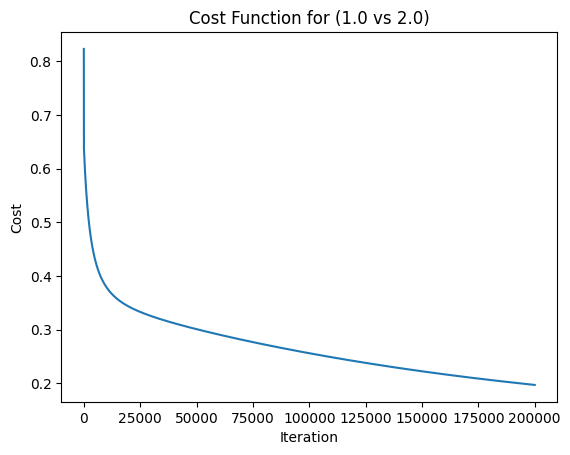

Convergence Iteration for (1.0 vs 2.0): 200000


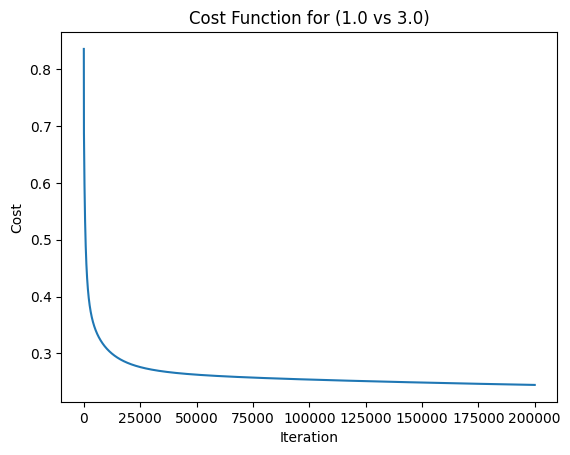

Convergence Iteration for (1.0 vs 3.0): 200000


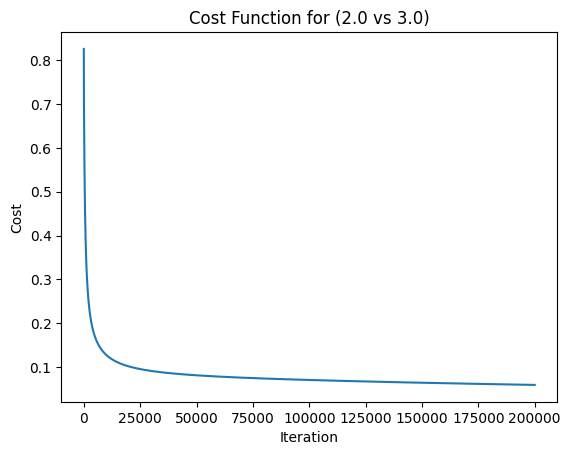

Convergence Iteration for (2.0 vs 3.0): 200000


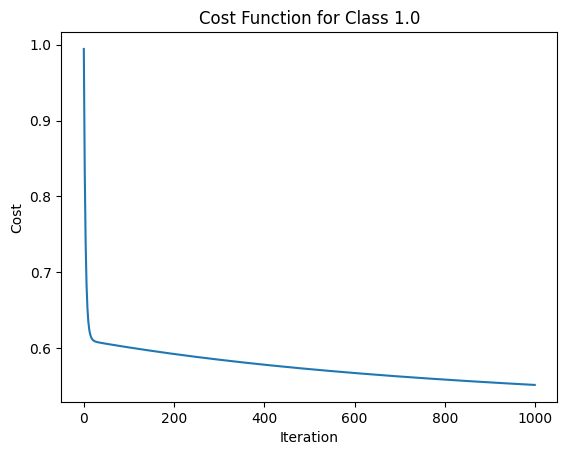

Convergence Iteration for Class 1.0: 1000


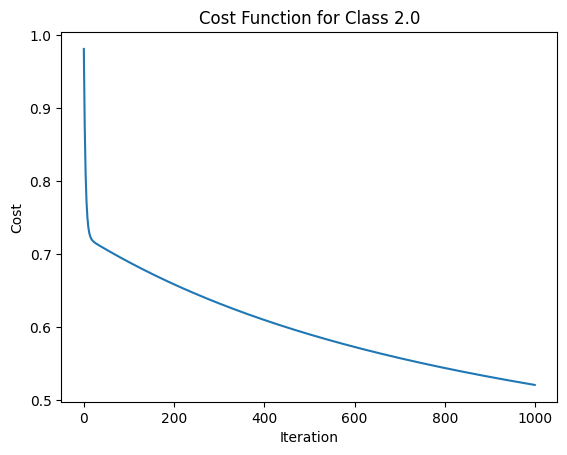

Convergence Iteration for Class 2.0: 1000


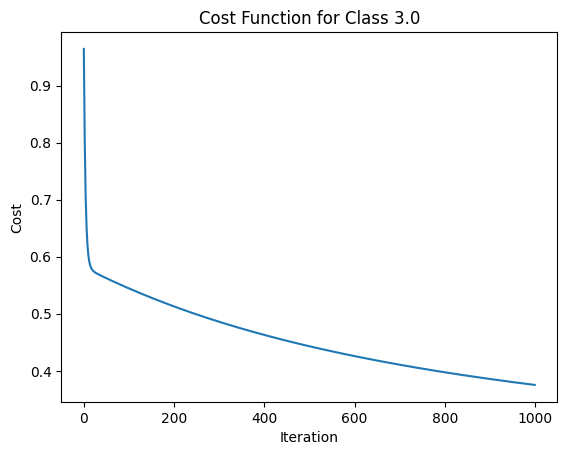

Convergence Iteration for Class 3.0: 1000


In [27]:

from functions1 import logistic_regression, predict, accuracy

# Function to load data
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter='\t')  # Assuming tab-delimited data
    X = data[:, :-1]  # Features
    y = data[:, -1]  # Labels
    return X, y

# Function to train and plot logistic regression
def train_and_plot(X, y, class_label, iterations=1000, learning_rate=0.001):
    weights, bias, cost_history = logistic_regression(X, y, iterations, learning_rate)

    # Plot cost function
    plt.figure()
    plt.plot(range(len(cost_history)), cost_history)
    plt.title(f'Cost Function for {class_label}')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

    # Report convergence iteration
    convergence_iteration = len(cost_history)
    print(f'Convergence Iteration for {class_label}: {convergence_iteration}')

    return weights, bias, cost_history[-1]

# Implementing OvO classification
def ovo_classification(X, y, iterations=200000, learning_rate=0.001):
    classes = np.unique(y)
    classifiers = {}

    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class1, class2 = classes[i], classes[j]
            idx = np.where((y == class1) | (y == class2))
            X_pair, y_pair = X[idx], y[idx]
            y_binary = np.where(y_pair == class1, 1, 0)

            weights, bias, last_cost = train_and_plot(X_pair, y_binary, f'({class1} vs {class2})', iterations, learning_rate)
            classifiers[(class1, class2)] = (weights, bias, last_cost)

    return classifiers

# Implementing OvA classification
def ova_classification(X, y, iterations=1000, learning_rate=0.001):
    classes = np.unique(y)
    classifiers = {}

    for class_ in classes:
        y_binary = np.where(y == class_, 1, 0)
        weights, bias, last_cost = train_and_plot(X, y_binary, f'Class {class_}', iterations, learning_rate)
        classifiers[class_] = (weights, bias, last_cost)

    return classifiers

# Main function for executing classifications
def main():
    # Load data
    X, y = load_data('data.txt')  # Replace with your data file path

    # Train OvO and OvA classifiers
    ovo_classifiers = ovo_classification(X, y)
    ova_classifiers = ova_classification(X, y)

    # Output summaries
    ovo_summary = {k: (v[0].shape, v[1], v[2]) for k, v in ovo_classifiers.items()}
    ova_summary = {k: (v[0].shape, v[1], v[2]) for k, v in ova_classifiers.items()}

    return ovo_summary, ova_summary

# Execute main function and get classifier summaries
ovo_summary, ova_summary = main()


### Ova train and test accuracy

In [24]:


# Function to load and split data
def load_and_split_data(file_path, test_size=0.3):
    data = np.loadtxt(file_path, delimiter='\t')  # Assuming tab-delimited data
    X = data[:, :-1]  # Features
    y = data[:, -1]  # Labels
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Function to train classifiers
def train_classifiers(X, y, classification_type, iterations=1000, learning_rate=0.01):
    classes = np.unique(y)
    classifiers = {}

    if classification_type == 'ova':
        for class_ in classes:
            y_binary = (y == class_).astype(int)
            weights, bias, cost_history = logistic_regression(X, y_binary, iterations, learning_rate)
            classifiers[class_] = (weights, bias, cost_history)

    elif classification_type == 'ovo':
        for i, class1 in enumerate(classes):
            for class2 in classes[i+1:]:
                idx = np.where((y == class1) | (y == class2))
                X_pair, y_pair = X[idx], y[idx]
                y_binary = np.where(y_pair == class1, 1, 0)
                weights, bias, cost_history = logistic_regression(X_pair, y_binary, iterations, learning_rate)
                classifiers[(class1, class2)] = (weights, bias, cost_history)

    return classifiers

# Function to evaluate OvA classifiers
def evaluate_classifiers_ova(classifiers, X, y):
    accuracies = {}
    for class_, (weights, bias, cost_history) in classifiers.items():
        y_binary = (y == class_).astype(int)
        y_pred = predict(X, weights, bias)
        acc = accuracy(y_binary, y_pred)
        accuracies[class_] = acc
    return accuracies

# Function to evaluate OvO classifiers
def evaluate_classifiers_ovo(classifiers, X, y):
    classes = np.unique(y)
    accuracies = {}
    for (class1, class2), (weights, bias, cost_history) in classifiers.items():
        idx = np.where((y == class1) | (y == class2))
        X_pair, y_pair = X[idx], y[idx]
        y_binary = np.where(y_pair == class1, 1, 0)

        y_pred = predict(X_pair, weights, bias)
        acc = accuracy(y_binary, y_pred)
        accuracies[f'{class1} vs {class2}'] = acc
    return accuracies


# Main function for executing classifications
# Main function for executing classifications
def main(file_path):
    X_train, X_test, y_train, y_test = load_and_split_data(file_path)

    # OvA
    ova_classifiers = train_classifiers(X_train, y_train, 'ova')
    ova_train_accuracy = evaluate_classifiers_ova(ova_classifiers, X_train, y_train)
    ova_test_accuracy = evaluate_classifiers_ova(ova_classifiers, X_test, y_test)

    # OvO
    ovo_classifiers = train_classifiers(X_train, y_train, 'ovo')
    ovo_train_accuracy = evaluate_classifiers_ovo(ovo_classifiers, X_train, y_train)
    ovo_test_accuracy = evaluate_classifiers_ovo(ovo_classifiers, X_test, y_test)

    return {
        'ova_train_accuracy': ova_train_accuracy, 
        'ova_test_accuracy': ova_test_accuracy,
        'ovo_train_accuracy': ovo_train_accuracy, 
        'ovo_test_accuracy': ovo_test_accuracy
    }

# Execute the main function and format the output
accuracies = main(file_path)

# Formatting the output for better readability
formatted_output = "Accuracies:\n"
for classification_type, accuracy_data in accuracies.items():
    formatted_output += f"\n{classification_type}:\n"
    for key, value in accuracy_data.items():
        formatted_output += f"  {key}: {value}\n"

print(formatted_output)


# Path to the data file
file_path = r'C:\Users\sepito\Documents\Python Scripts\PatternRecognition\HW2\data.txt'  # Replace with the correct path



Accuracies:

ova_train_accuracy:
  1.0: 0.8209876543209876
  2.0: 0.8950617283950617
  3.0: 0.9197530864197531

ova_test_accuracy:
  1.0: 0.7857142857142857
  2.0: 0.9
  3.0: 0.9428571428571428

ovo_train_accuracy:
  1.0 vs 2.0: 0.912621359223301
  1.0 vs 3.0: 0.8849557522123894
  2.0 vs 3.0: 0.9629629629629629

ovo_test_accuracy:
  1.0 vs 2.0: 0.875
  1.0 vs 3.0: 0.8809523809523809
  2.0 vs 3.0: 0.96



In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from functions1 import logistic_regression, predict, accuracy

# Assuming load_data is defined as before
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter='\t')  # Assuming tab-delimited data
    X = data[:, :-1]  # Features
    y = data[:, -1]  # Labels
    return X, y

# Function to split the dataset into training and test sets
def split_data(X, y, test_size=0.3):
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Implementing OvA classification
def ova_classification(X, y, iterations=1000, learning_rate=0.01):
    classes = np.unique(y)
    classifiers = {}
    
    for class_ in classes:
        y_binary = (y == class_).astype(int)
        weights, bias, cost_history = logistic_regression(X, y_binary, iterations, learning_rate)  # Capture cost_history
        classifiers[class_] = (weights, bias, cost_history)  # Store weights, bias, and cost_history

    return classifiers

# Function to evaluate the classifiers
def evaluate_classifiers_ova(classifiers, X_train, y_train, X_test, y_test):
    accuracies = {}
    for class_, (weights, bias, cost_history) in classifiers.items():
        y_train_binary = (y_train == class_).astype(int)
        y_test_binary = (y_test == class_).astype(int)

        y_pred_train = predict(X_train, weights, bias)
        train_accuracy = accuracy(y_train_binary, y_pred_train)

        y_pred_test = predict(X_test, weights, bias)
        test_accuracy = accuracy(y_test_binary, y_pred_test)

        accuracies[class_] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

    return accuracies

# Main function for OvA
def main_ova(file_path):
    X, y = load_data(file_path)
    X_train, X_test, y_train, y_test = split_data(X, y)
    classifiers = ova_classification(X_train, y_train)
    accuracies = evaluate_classifiers_ova(classifiers, X_train, y_train, X_test, y_test)
    return accuracies

# Path to the data file
file_path = r'C:\Users\sepito\Documents\Python Scripts\PatternRecognition\HW2\data.txt'  # Replace with the correct path

# Calculate accuracies for OvA
accuracies_ova = main_ova(file_path)
accuracies_ova


{1.0: {'train_accuracy': 0.8209876543209876,
  'test_accuracy': 0.7857142857142857},
 2.0: {'train_accuracy': 0.8950617283950617, 'test_accuracy': 0.9},
 3.0: {'train_accuracy': 0.9197530864197531,
  'test_accuracy': 0.9428571428571428}}

### OvO train and test accuracy

In [22]:
# Function to implement OvO classification
def ovo_classification(X, y, iterations=1000, learning_rate=0.01):
    classes = np.unique(y)
    classifiers = {}
    for i, class1 in enumerate(classes):
        for class2 in classes[i+1:]:
            # Binary classification for each pair of classes
            idx = np.where((y == class1) | (y == class2))
            X_pair, y_pair = X[idx], y[idx]
            y_binary = np.where(y_pair == class1, 1, 0)

            weights, bias, cost_history = logistic_regression(X_pair, y_binary, iterations, learning_rate)  # Capture cost_history
            classifiers[(class1, class2)] = (weights, bias, cost_history)  # Store weights, bias, and cost_history
    return classifiers

# Function to evaluate OvO classifiers
def evaluate_classifiers_ovo(classifiers, X, y):
    classes = np.unique(y)
    num_classes = len(classes)
    predictions = np.zeros((X.shape[0], num_classes))

    # Generate predictions for each classifier
    for (class1, class2), (weights, bias, cost_history) in classifiers.items():
        idx1, idx2 = np.where(classes == class1)[0][0], np.where(classes == class2)[0][0]
        preds = predict(X, weights, bias).astype(int)
        predictions[:, idx1] += preds
        predictions[:, idx2] += (1 - preds)

    # Final prediction is the class with the most votes
    final_predictions = classes[np.argmax(predictions, axis=1)]
    return accuracy(y, final_predictions)

# Main function for OvO
def main_ovo(file_path):
    X, y = load_data(file_path)
    X_train, X_test, y_train, y_test = split_data(X, y)
    classifiers = ovo_classification(X_train, y_train)
    train_accuracy = evaluate_classifiers_ovo(classifiers, X_train, y_train)
    test_accuracy = evaluate_classifiers_ovo(classifiers, X_test, y_test)
    return {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

# Calculate accuracies for OvA and OvO
accuracies_ova = main_ova(file_path)
accuracies_ovo = main_ovo(file_path)

accuracies_ova


TypeError: evaluate_classifiers_ova() takes 3 positional arguments but 5 were given

### SoftMax

In [ ]:
# Define the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Compute the cost function
def compute_cost(X, y, weights):
    m = X.shape[0]
    logits = np.dot(X, weights)
    y_pred = softmax(logits)
    cost = -np.mean(np.sum(y * np.log(y_pred + 1e-15), axis=1)) # adding a small constant to prevent log(0)
    return cost

# Perform gradient descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = X.shape[0]
    cost_history = []

    for i in range(iterations):
        logits = np.dot(X, weights)
        y_pred = softmax(logits)
        gradient = np.dot(X.T, (y_pred - y)) / m
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        
    return weights, cost_history

# Prediction function
def predict(X, weights):
    logits = np.dot(X, weights)
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Calculate accuracy manually
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    return correct_predictions / total_predictions

# Load and prepare data
file_name = "data.txt"
col_name = ['feature' + str(i) for i in range(7)] + ['label']
data = pd.read_csv(file_name, sep='\t', header=None, names=col_name)

# Split the data
train, test = train_test_split(data, test_size=0.25, random_state=42)

# Prepare data for training
X_train = np.hstack((np.ones((train.shape[0], 1)), train.drop('label', axis=1).values)) # Add intercept
y_train = pd.get_dummies(train['label']).values # One-hot encoding
X_test = np.hstack((np.ones((test.shape[0], 1)), test.drop('label', axis=1).values))
y_test = pd.get_dummies(test['label']).values

# Hyperparameters
learning_rate = 0.01
iterations = 1000
num_classes = y_train.shape[1]
weights = np.zeros((X_train.shape[1], num_classes))

# Run gradient descent
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# Plot the cost function
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

# Convert one-hot encoded labels back to single label for accuracy calculation
y_train_single_label = np.argmax(y_train, axis=1)
y_test_single_label = np.argmax(y_test, axis=1)

# Get predictions
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

# Calculate accuracies
train_accuracy = calculate_accuracy(y_train_single_label, y_train_pred)
test_accuracy = calculate_accuracy(y_test_single_label, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")